**QBO plots**

This notebook can be used to plot QBO characteristics and compare with ERA5.

Contains:
- Time series of zonal mean zonal wind averaged from 5S to 5N
- Dunkerton and Delisi QBO amplitude

Still to add:
- Metrics for QBO period

Isla Simpson (Feb 25th 2021)

In [1]:
from dycoreutils import readdata_utils as read
from dycoreutils import spatialaverage_utils as spatavg
from dycoreutils import plot_utils as dycoreplt
from dycoreutils import calendar_utils as cal

import matplotlib.pyplot as plt
import numpy as np
import importlib
import warnings
warnings.filterwarnings('ignore')


importlib.reload(dycoreplt)
importlib.reload(read)
importlib.reload(cal)
importlib.reload(dycoreplt)

<module 'dycoreutils.plot_utils' from '/home/islas/python/dycorediags/dycoreutils/plot_utils.py'>

In [2]:
plotpath="/web/web-data/staff/islas/verticalres/"

In [3]:
# set up Dunkerton and Delisi amplitude calculation
def calcddamp(data):
    datseas = data.groupby('time.month').mean('time')
    datdeseas = data.groupby('time.month')-datseas
    ddamp = np.sqrt(2)*datdeseas.std(dim='time')
    return ddamp

In [4]:
# specify start and end years for plotting
ystart="1979" ; yend="1989"

In [5]:
# Read in ERA5 data for comparison
ERA5path="/project/haggis/ERA5/mon/U/*.nc"
uzm = read.read_zonalmean(ERA5path,ystart+"-01",yend+"-12")
uzm_trop_ERA5 = spatavg.cosweightlat(uzm,-5,5)
time_ERA5 = cal.date2fracofyear_monthly(uzm.time)
ddamp_ERA5 = calcddamp(uzm_trop_ERA5.ua)

In [6]:
# setting up plot locations
x1, x2, y1, y2 = dycoreplt.get3by3coords()

In [12]:
# specifying model simulation files.
# if you want to add a new simulation, specify that by adding the following to case
# name:filename
# where "name" is the name of the experiment and "filename" is the name of the zonal wind file.
# this currently assumes $filename is located in $basepath/$name/.
basepath="/project/cas/islas/verticalresolution/"

case={"sponge5":"U_f.e21.FWscHIST.ne30_L81_tag20210203_sponge5.001.1979-01_1989-12.nc",
     "default-sponge":"U_f.e21.FWscHIST.ne30_L81_tag20210203_default-sponge.001.1979-01_1989-12.nc",
     "sponge5_marshian":"U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian.001.1979-01_1990-12.nc",
     "sponge5-marshian_top-taper":"U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian_top-taper.001.1979-01_1989-12.nc"}

/project/cas/islas/verticalresolution/sponge5/U_f.e21.FWscHIST.ne30_L81_tag20210203_sponge5.001.1979-01_1989-12.nc
/project/cas/islas/verticalresolution/default-sponge/U_f.e21.FWscHIST.ne30_L81_tag20210203_default-sponge.001.1979-01_1989-12.nc
/project/cas/islas/verticalresolution/sponge5_marshian/U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian.001.1979-01_1990-12.nc
/project/cas/islas/verticalresolution/sponge5-marshian_top-taper/U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian_top-taper.001.1979-01_1989-12.nc


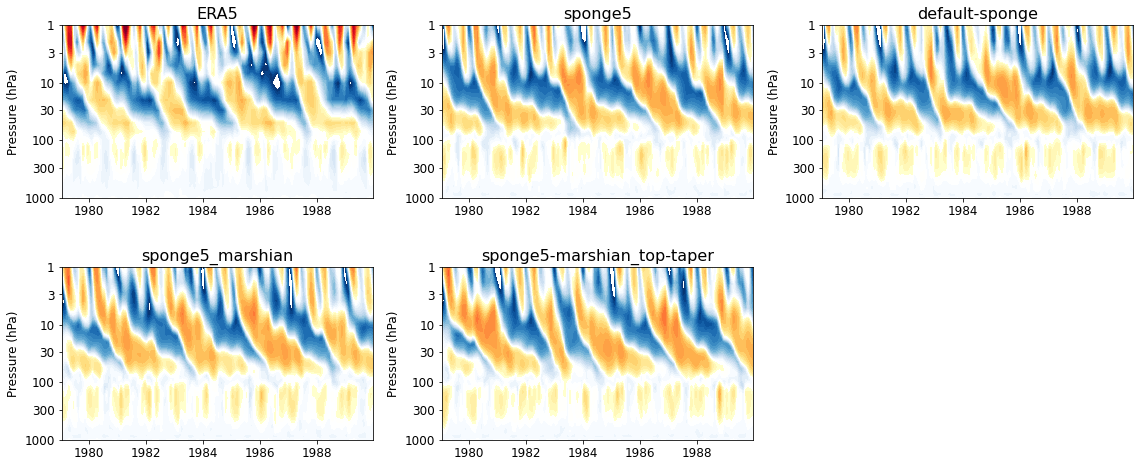

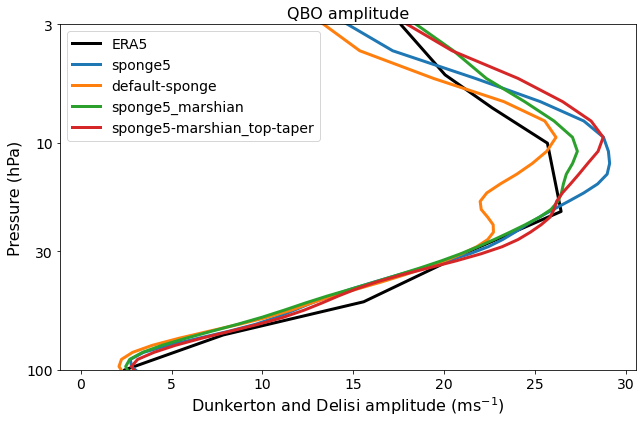

In [13]:
# Calculating QBO metrics and plotting them
fig_timeseries = plt.figure(figsize=(16,16))
fig_ddamp = plt.figure(figsize=(16,16))

# ERA5 time series
countplot=0
datplot = np.moveaxis(np.array(uzm_trop_ERA5.ua),1,0)
ax = dycoreplt.plotqbowinds(fig_timeseries, datplot, time_ERA5, uzm_trop_ERA5.pre, 2, -40, 40, 'ERA5', x1[countplot],x2[countplot],y1[countplot],y2[countplot])
countplot=countplot+1

# ERA5 DD amplitude
ax_dd = dycoreplt.plotddamp(fig_ddamp,ddamp_ERA5, ddamp_ERA5.pre, 'ERA5', 0.1,0.6,0.5,0.8, color='black')

for key in case:
    filename=case[key]
    fname=basepath+key+"/"+filename
    print(fname)
    uzm = read.read_cesm_zonalmean(fname,ystart+"-01",yend+"-12")
    uzm_trop = spatavg.cosweightlat(uzm,-5,5)
    time = cal.date2fracofyear_monthly(uzm.time)

    # simulation time series
    datplot = np.moveaxis(np.array(uzm_trop.U),1,0)
    ax = dycoreplt.plotqbowinds(fig_timeseries, datplot,time,uzm.lev, 2, -40, 40, key, x1[countplot],x2[countplot],y1[countplot],y2[countplot])

    # calculate dunkerton and delisi amplitude
    ddamp = calcddamp(uzm_trop.U)
    
    # plot simulation Dunkerton and Delisi amplitude
    ax_dd = dycoreplt.plotddamp(fig_ddamp, ddamp, ddamp.lev,key,oplot=True, ax = ax_dd)
    
    countplot=countplot+1
    
ax_dd.legend()

In [14]:
fig_timeseries.savefig(plotpath+"QBOtimeseries.pdf", facecolor="white", bbox_inches="tight")
fig_ddamp.savefig(plotpath+"DDamplitude.pdf", facecolor="white", bbox_inches="tight")